In [12]:
import os
import numpy as np
import glob
import PIL.Image as Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary
import torch.optim as optim
from time import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
import os
sys.path.append('/zhome/45/0/155089/Deeplearning_in_computer_vision/Segmentation_project/Asignments_DeepLearningForCV/')  
from Performance_Metrics import dice_coefficient, intersection_over_union, accuracy, sensitivity, specificity
#import dataset PH2 
from DataLoader_PH2 import train_loader , val_loader, test_loader
import time 
from time import time  # Correct import

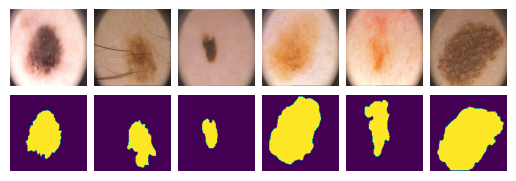

In [23]:
#Check if dataset looks okidoki
images, labels = next(iter(train_loader))

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.swapaxes(np.swapaxes(images[i], 0, 2), 0, 1))
    plt.axis('off')  

    plt.subplot(2, 6, i+7)
    plt.imshow(labels[i].squeeze())
    plt.axis('off')  

# Juster afstanden mellem subplots horisontalt (wspace=0 fjerner mellemrummet helt)
plt.subplots_adjust(wspace=0.1, hspace=-0.7)

plt.show()

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


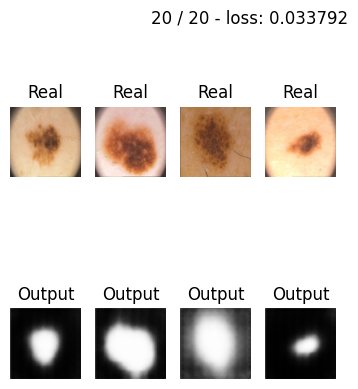

In [21]:
from Encoder_Decoder_PH2 import EncDec 
from UNet2 import bce_loss, dice_loss, focal_loss, bce_total_variation, focal_loss_chatten, stable_bce_loss, UNet2
from EncDecPH2_TRAINING_TESTING import train, test
model = EncDec().to(device)
train(model, optim.Adam(model.parameters(), 0.001), focal_loss_chatten, 20, train_loader, val_loader)


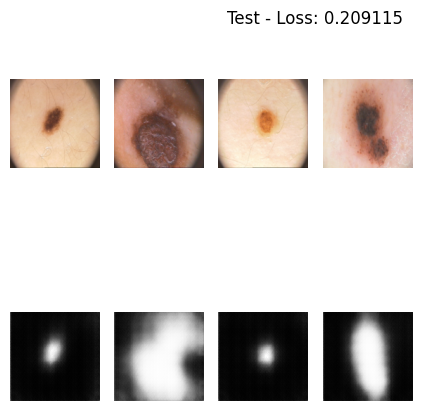

Dice: -0.6376, IoU: -0.2417, Accuracy: 0.9310, Sensitivity: 0.8064, Specificity: 0.9706


In [22]:
test(model, test_loader, bce_loss) 

In [7]:
from DataLoader_PH2 import Full_set

print(Full_set.__len__())


200


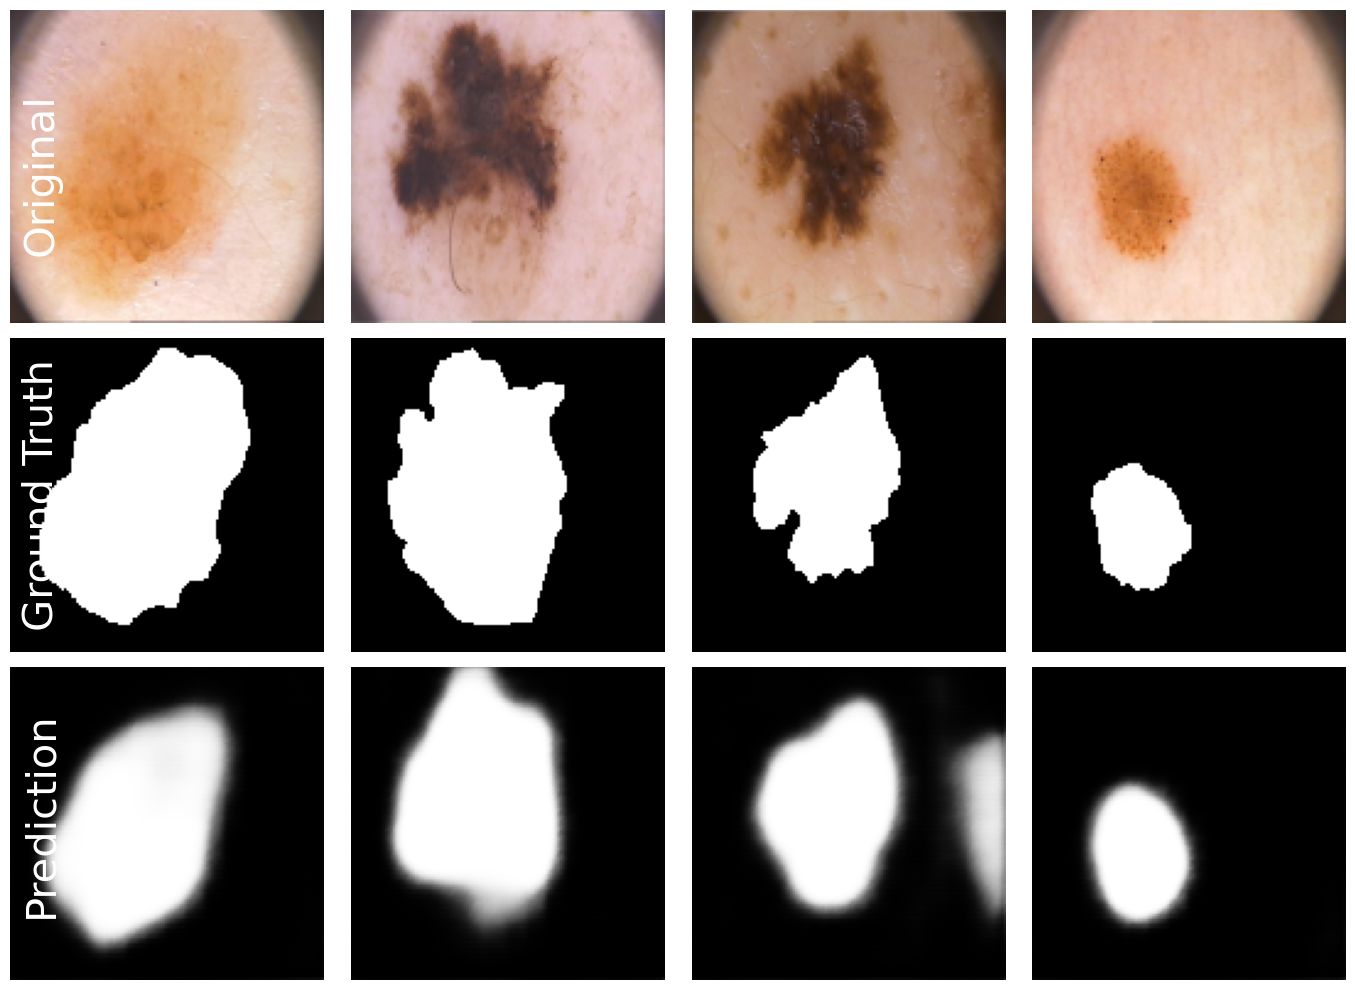

In [8]:
from EncDecPH2_TRAINING_TESTING import visualize_test_predictions
from Encoder_Decoder_PH2 import device
visualize_test_predictions(model, test_loader, device)